In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv(r"diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:>

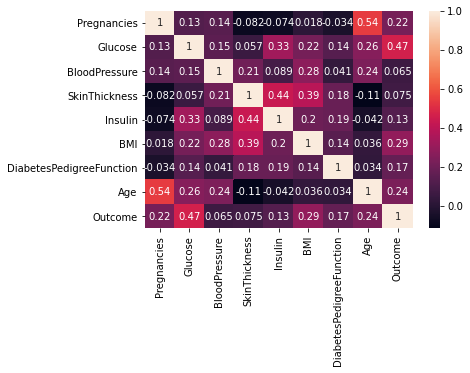

In [71]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)

In [72]:
# Elimino las variables con correlacion menor a 0.1. No hay multi correlacion
#df = df.drop(columns=["BloodPressure", "SkinThickness"])

# Mejor los voy a mantener ya que la precision de mi modelo disminuye ligeramente sin ellos

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

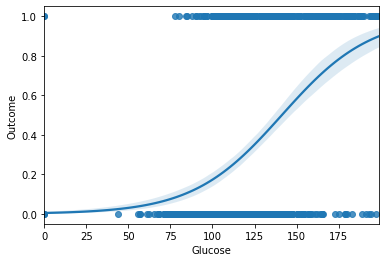

In [73]:
sns.regplot(x= 'Glucose', y= 'Outcome', data= df, logistic=True)

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

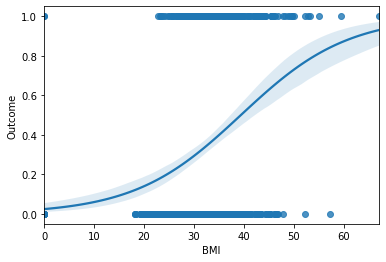

In [74]:
sns.regplot(x= 'BMI', y= 'Outcome', data= df, logistic=True)

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

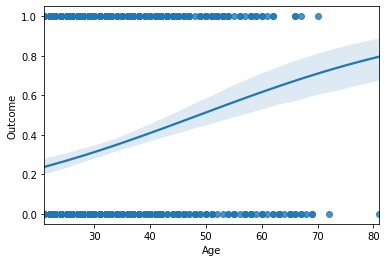

In [75]:
sns.regplot(x= 'Age', y= 'Outcome', data= df, logistic=True)

## Applying Logistic Regression

In [76]:
response = df[["Outcome"]]
predictors = df.drop("Outcome", axis=1)

In [77]:
from sklearn.model_selection import train_test_split

split = train_test_split(predictors, response, test_size=0.20, random_state=99)

predictors_train = split[0]
predictors_test = split[1]
response_train = split[2]
response_test = split[3]

In [78]:
from sklearn.linear_model import LogisticRegression
import numpy as np

regressor = LogisticRegression(solver='liblinear')
regressor.fit(predictors_train, np.ravel(response_train))

LogisticRegression(solver='liblinear')

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

response_predictions = regressor.predict(predictors_test)
print("  TN  FP")
print(confusion_matrix(response_test, response_predictions))
print("  FN  TP")
print()
print(classification_report(response_test, response_predictions,target_names=["No Diabetes","Diabetes"]))

  TN  FP
[[94 11]
 [20 29]]
  FN  TP

              precision    recall  f1-score   support

 No Diabetes       0.82      0.90      0.86       105
    Diabetes       0.72      0.59      0.65        49

    accuracy                           0.80       154
   macro avg       0.77      0.74      0.76       154
weighted avg       0.79      0.80      0.79       154



In [85]:
response_predictions = regressor.predict(predictors_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from  numpy import sqrt

print('Mean Absolute Error:', round(mean_absolute_error(response_test, response_predictions),3))
print('Root Mean Squared Error:', sqrt(mean_squared_error(response_test, response_predictions)))

Mean Absolute Error: 0.201
Root Mean Squared Error: 0.44866323818505716


In [89]:
# Testeo con el indice 0 del dataset el cual devuelve 1 
entrada = [[6,148, 72, 35,0,33.6,0.627,50]]
regressor.predict(entrada)

array([1], dtype=int64)

In [ ]:
# Testeo con el indice 1 del dataset el cual devuelve 0
entrada = [[1,85, 66, 29,0,26.6,0.351,31]]
regressor.predict(entrada)